In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
dat = pd.read_csv("us_births_2016_2021.csv")

In [79]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


In [80]:
dat

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [81]:
for i in dat["Education Level of Mother"].unique():
    print(i)

8th grade or less
9th through 12th grade with no diploma
High school graduate or GED completed
Some college credit, but not a degree
Associate degree (AA, AS)
Bachelor's degree (BA, AB, BS)
Master's degree (MA, MS, MEng, MEd, MSW, MBA)
Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)
Unknown or Not Stated


In [82]:
# convert g to pounds
dat["Average Birth Weight (lb)"] = dat["Average Birth Weight (g)"].apply(lambda x: (x/453.59237))
dat.drop(columns="Average Birth Weight (g)", inplace=True)

In [83]:
dat.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (lb)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,6.871588
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,6.702053
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,6.790238
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,6.882611
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,6.998134


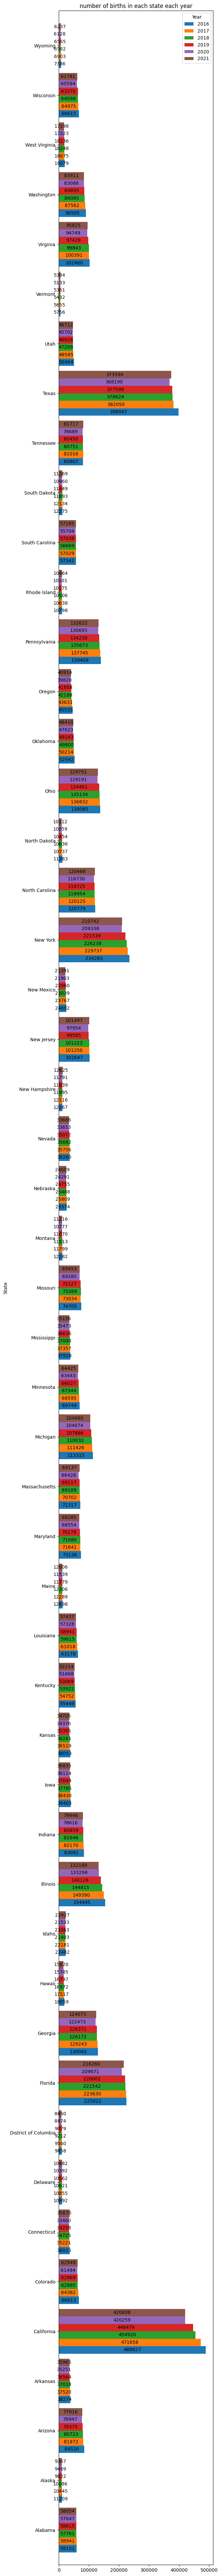

In [174]:
# state where most number of births were 
d = dat.groupby(["State", "Year"])["Number of Births"].agg(sum).reset_index()
plot = d.pivot_table(values="Number of Births", index="State", columns="Year").plot.barh(figsize=(6, 100), width=(.9))
plt.title("number of births in each state each year");
for c in plot.containers:
    plot.bar_label(c, label_type="center", zorder=2)

In [96]:
print(dat["Average Age of Mother (years)"].min())
print(dat["Average Age of Mother (years)"].max())
print(dat["Average Age of Mother (years)"].mean())

23.1
35.5
29.552274381368267


In [91]:
dat.groupby(["Education Level of Mother", "Year"])[["Number of Births", "Average Age of Mother (years)"]].agg(max)

Number of Births   
Education Level of Mother                          Year                     
8th grade or less                                  2016             10245  \
                                                   2017              9238   
                                                   2018              8452   
                                                   2019              7632   
                                                   2020              6716   
                                                   2021              6324   
9th through 12th grade with no diploma             2016             30035   
                                                   2017             27281   
                                                   2018             25861   
                                                   2019             23447   
                                                   2020             21630   
                                                   2021             19711   
Associate degree (AA, AS)                          2016             16283   
                                                   2017             15877   
                                                   2018             15251   
                                                   2019             15469   
                                                   2020             14387   
                                                   2021             14802   
Bachelor's degree (BA, AB, BS)                     2016             48516   
                                                   2017             48441   
                                                   2018             47166   
                                                   2019             47107   
                                                   2020             44311   
                                                   2021             45112   
Doctorate (PhD, EdD) or Professional Degree (MD... 2016              7042   
                                                   2017              7064   
                                                   2018              7138   
                                                   2019              7226   
                                                   2020              7019   
                                                   2021              7608   
High school graduate or GED completed              2016             59967   
                                                   2017             57487   
                                                   2018             55222   
                                                   2019             54944   
                                                   2020             54950   
                                                   2021             55462   
Master's degree (MA, MS, MEng, MEd, MSW, MBA)      2016             21445   
                                                   2017             21374   
                                                   2018             21646   
                                                   2019             21683   
                                                   2020             20652   
                                                   2021             21231   
Some college credit, but not a degree              2016             49404   
                                                   2017             47897   
                                                   2018             45121   
                                                   2019             43524   
                                                   2020             40223   
                                                   2021             39122   
Unknown or Not Stated                              2016             13112   
                                                   2017             12425   
                                                   20